# Handling duplicate proxies in a `ProxyDatabase`

A common situation  is for a `ProxyDatabase` to contain records that are either exact duplicates of each other, or whose series are so highly correlated as to be redundant. This is generally an undesirable sitation, and can even be fatal to some climate field reconstruction algorithms like GraphEM.
Therefore, we need to identify and remove such duplicates.

This notebook shows how to achive that goal with the `cfr` utilities.

In [1]:
%load_ext autoreload
%autoreload 2

import cfr
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt

## Load a database with duplicated proxies

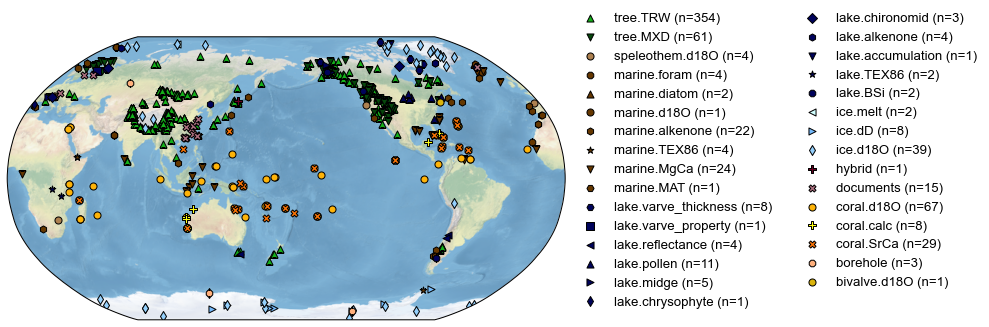

In [2]:
# load a proxy database with accidental duplicates
job = cfr.ReconJob()
job.proxydb = pd.read_pickle('./data/pseudoPAGES2k/pseudo.tpn_SNR10_bug.pkl')
fig, ax = job.proxydb.plot()

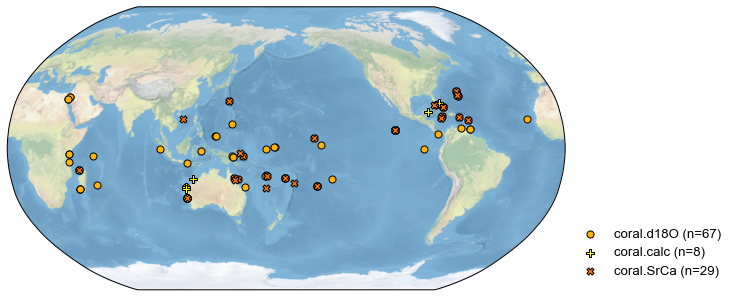

In [3]:
# filter the database to focus on corals
job.proxydb = job.proxydb.filter(by='ptype', keys='coral')
fig, ax = job.proxydb.plot()

In [4]:
job.proxydb = job.proxydb.center([1951, 1980]) # optional

Centering each of the ProxyRecord: 100%|█████████████████████████████████████████████████████████████████████████████████████| 104/104 [00:00<00:00, 3830.85it/s]


## Find the duplicates

>>> Groups of duplicates:
0 {'Ocn_142', 'Ocn_140', 'Ocn_110', 'Ocn_065', 'Ocn_143', 'Ocn_070', 'Ocn_141', 'Ocn_060'}
1 {'Ocn_075', 'Ocn_156', 'Ocn_157'}
2 {'Ocn_078', 'Ocn_076'}
3 {'Ocn_106', 'Ocn_091', 'Ocn_093', 'Ocn_095'}
4 {'Ocn_125', 'Ocn_096', 'Ocn_178', 'Ocn_127'}
5 {'Ocn_145', 'Ocn_144', 'Ocn_138', 'Ocn_066', 'Ocn_067', 'Ocn_068', 'Ocn_069'}
6 {'Ocn_114', 'Ocn_158', 'Ocn_153'}
7 {'Ocn_149', 'Ocn_151', 'Ocn_147', 'Ocn_072', 'Ocn_152', 'Ocn_150', 'Ocn_111', 'Ocn_169', 'Ocn_112', 'Ocn_071', 'Ocn_168'}
8 {'Ocn_107', 'Ocn_129', 'Ocn_177', 'Ocn_098', 'Ocn_128', 'Ocn_103'}
9 {'Ocn_082', 'Ocn_080'}
10 {'Ocn_173', 'Ocn_171'}
11 {'Ocn_181', 'Ocn_108', 'Ocn_182', 'Ocn_123'}
12 {'Ocn_115', 'Ocn_116'}
13 {'Ocn_170', 'Ocn_172', 'Ocn_174', 'Ocn_118'}
14 {'Ocn_179', 'Ocn_090', 'Ocn_097', 'Ocn_166', 'Ocn_180'}
15 {'Ocn_154', 'Ocn_155'}
16 {'Ocn_130', 'Ocn_131'}
17 {'Ocn_083', 'Ocn_077', 'Ocn_062', 'Ocn_061', 'Ocn_139'}
18 {'Ocn_119', 'Ocn_104', 'Ocn_161', 'Ocn_159', 'Ocn_162', 'Ocn_160', 'Ocn_1

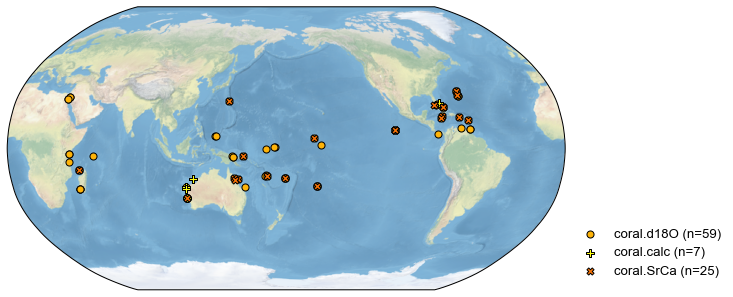

In [5]:
# r_thresh = 0.9 by default, R >= r_thresh will be regarded as duplicates
pdb_dups = job.proxydb.find_duplicates(r_thresh=0.9, time_period=[1001, 2000])
fig, ax = pdb_dups.plot()

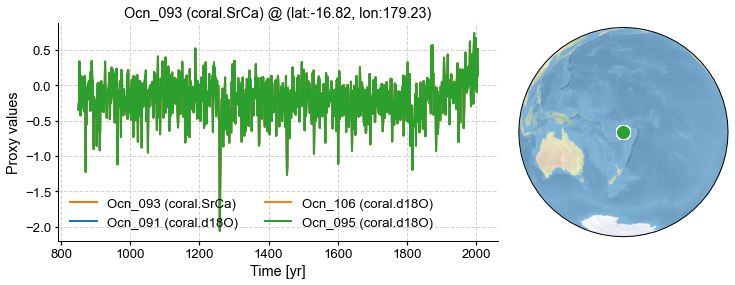

In [6]:
fig, ax = pdb_dups.records['Ocn_093'].plot_dups(lgd_kws={'ncol': 2})

In this example, those 4 pseudoproxies are all identical, so one would want to exclude 3 of those. We can do so using `squeeze_dups():`

In [7]:
# squeeze the dupilicates manually
# pids_to_keep = ['Ocn_178', 'Ocn_106', 'Ocn_179', 'Ocn_160', 'Ocn_170', 'Ocn_076', 'Ocn_082', 'Ocn_181', 'Ocn_164', 'Ocn_121', 'Ocn_130', 'Ocn_083', 'Ocn_143', 'Ocn_116', 'Ocn_158', 'Ocn_066', 'Ocn_150', 'Ocn_103', 'Ocn_154', 'Ocn_075', 'Ocn_171']
# pdb_to_keep = pdb_dups.squeeze_dups(pids_to_keep=pids_to_keep)

In [8]:
pdb_to_keep = pdb_dups.squeeze_dups()

>>> Note: since `pids_to_keep` is not specified, the first of each group of the duplicates is picked.
>>> pids to keep (n=21):
{'Ocn_170', 'Ocn_125', 'Ocn_107', 'Ocn_115', 'Ocn_082', 'Ocn_106', 'Ocn_119', 'Ocn_175', 'Ocn_145', 'Ocn_078', 'Ocn_075', 'Ocn_114', 'Ocn_149', 'Ocn_154', 'Ocn_130', 'Ocn_179', 'Ocn_083', 'Ocn_142', 'Ocn_181', 'Ocn_120', 'Ocn_173'}


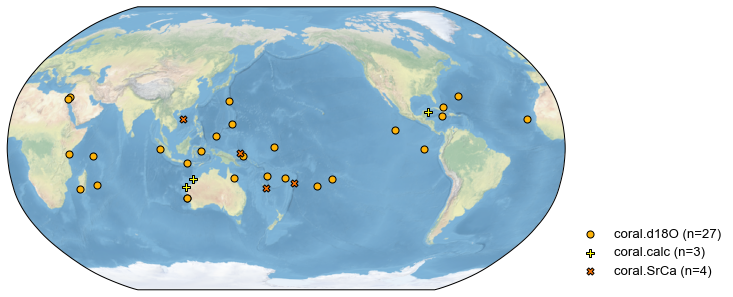

In [9]:
# update the proxy database, excluding duplicates
job.proxydb = job.proxydb - pdb_dups + pdb_to_keep
fig, ax = job.proxydb.plot()